Nama : Annisa Putri Aulia
NIM : H071191029

Tugas Deep Learning Minggu 4 
soal : Pelajari arsitektur LeNet

**LeNet**

LeNet atau LeNet-5 merupakan struktur CNN yang diusulkan oleh Yann LeCun et al. Struktur LeNet termasuk struktur yang sederhana, terdiri dari 2 layer konvolusi, 2 layer pooling, dan 3 Fully connected layer.

LeNet cocok untuk masalah object recognition pada gambar hitam dan putih beresolusi rendah

**Implementasi LeNet dengan tensorflow**

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from matplotlib import pyplot as plt

Kita akan melakukan klasifikasi pada dataset mnist menggunakan LeNet

In [2]:
# Load data
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

# Normalisasi
x_train= x_train/255
x_test= x_test/255

print(len(x_train), len(x_test))

11501568/11490434 [==============================] - 0s 0us/step
60000 10000


In [3]:
x_train[0].shape

(28, 28)

Selanjutnya kita membuat model LeNet sesuai struktur nya

In [4]:
lenet= tf.keras.models.Sequential([
  # Layer konvolusi dengan besar kernel 5x5, tidak ditambahkan padding, dan outputnya 6 channel
  keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28, 28, 1)),
  keras.layers.AvgPool2D(pool_size=2, strides=2),
  # Layer konvolusi dengan besar kernel 5x5, tidak ditambahkan padding, dan outputnya 16 channel
  keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
  keras.layers.AvgPool2D(pool_size=2, strides=2),
  # Mem-flatten feature map
  keras.layers.Flatten(),
  # 3 layer fcn
  keras.layers.Dense(120, activation='sigmoid'),
  keras.layers.Dense(84, activation='sigmoid'),
  # Layer output terdiri dari 10 kelas sesuai kelas mnist
  keras.layers.Dense(10)
])

Struktur model yang baru saja dibuat

In [5]:
X = tf.random.uniform((1, 28, 28, 1))
for layer in lenet.layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2D output shape:	 (1, 28, 28, 6)
AveragePooling2D output shape:	 (1, 14, 14, 6)
Conv2D output shape:	 (1, 10, 10, 16)
AveragePooling2D output shape:	 (1, 5, 5, 16)
Flatten output shape:	 (1, 400)
Dense output shape:	 (1, 120)
Dense output shape:	 (1, 84)
Dense output shape:	 (1, 10)


Meng-compile model dengan optimizer SGD dan loss function sparse categorical crossentropy lalu melakukan proses train dengan 10 epochs



In [6]:
optimizer = keras.optimizers.SGD(learning_rate=0.9)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

lenet.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

lenet.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 2.3116 - accuracy: 0.1060
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 2.3080 - accuracy: 0.1041
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3078 - accuracy: 0.1059
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3083 - accuracy: 0.1024
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 2.3078 - accuracy: 0.1025
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3083 - accuracy: 0.1020
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 2.3079 - accuracy: 0.1032
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3077 - accuracy: 0.1055
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3080 - accuracy: 0.1039
Epoch 10/10
1875/1875 [==============================] - 41s 22m

Evaluasi

In [7]:
lenet.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.3141 - accuracy: 0.0982


[2.31406831741333, 0.0982000008225441]

**Visualisasi LeNet**

Mengambil index layer dari LeNet yang merupakan layer konvolusi (termasuk layer pooling)

In [8]:
conv_layers_idx_list= [i for i in range(len(lenet.layers)) if 'conv' in lenet.layers[i].name or 'pooling' in lenet.layers[i].name]

conv_layers_idx_list

[0, 1, 2, 3]

Fungsi untuk menampilkan gambar yang dihasilkan dari layer konvolusi

In [9]:
from numpy import expand_dims
from keras.models import Model  

def show_conv_layers(idx, img= None):
    global lenet
    temp_model = Model(inputs=lenet.inputs, outputs=lenet.layers[idx].output)

    if img is None:
        img = x_test[0]

    img = expand_dims(img, axis=0)
    feature_maps = temp_model.predict(img)
    print(f'{lenet.layers[idx].name} : output gambar {feature_maps.shape[1]} x {feature_maps.shape[2]}, {feature_maps.shape[-1]} channel')

    rows= feature_maps.shape[-1]  
    idx = 0

    plt.figure(figsize=(10,4))
    for _ in range(rows):
        ax = plt.subplot(1, rows, idx+1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, idx], cmap='gray')
        idx += 1

    plt.show()

Menampilkan output dari layer-layer konvolusi

conv2d : output gambar 28 x 28, 6 channel


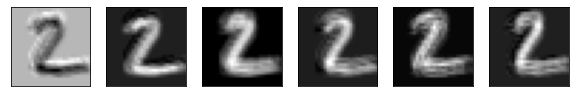

average_pooling2d : output gambar 14 x 14, 6 channel


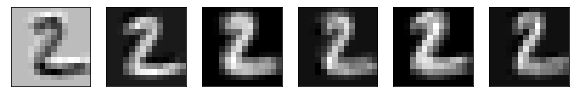

conv2d_1 : output gambar 10 x 10, 16 channel


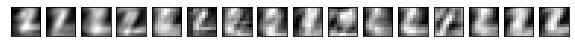

average_pooling2d_1 : output gambar 5 x 5, 16 channel


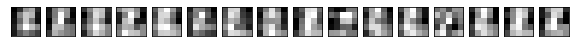

In [10]:
img= x_test[1]
for i in conv_layers_idx_list:
      show_conv_layers(i, img)